In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('breast-cancer-dataset.csv')

X = dataset.iloc[:, 2: 10].values
Y = dataset.iloc[:, -1].values
X[X == '#'] = np.nan
Y[Y == '#'] = np.nan

dataset.head(5)

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign


In [4]:
dataset.columns

Index(['S/N', 'Year', 'Age', 'Menopause', 'Tumor Size (cm)', 'Inv-Nodes',
       'Breast', 'Metastasis', 'Breast Quadrant', 'History',
       'Diagnosis Result'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y
labelencoder_x = LabelEncoder()
X[:,4] = labelencoder_x.fit_transform(X[:,4])
X[:,6] = labelencoder_x.fit_transform(X[:,6])

Y

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [6]:
Y=Y.reshape(-1,1)
from sklearn.impute import SimpleImputer
imputerX = SimpleImputer(strategy = "mean", missing_values = np.nan)
imputerX = imputerX.fit(X[:,:])
X[:,:] = imputerX.transform(X[:,:])
imputerY = SimpleImputer(strategy = "mean", missing_values = np.nan)
imputerY = imputerY.fit(Y)
Y = imputerY.transform(Y)
Y = np.ravel(Y)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [10]:
y_pred = classifier.predict(X_test)
y_pred

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0.])

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

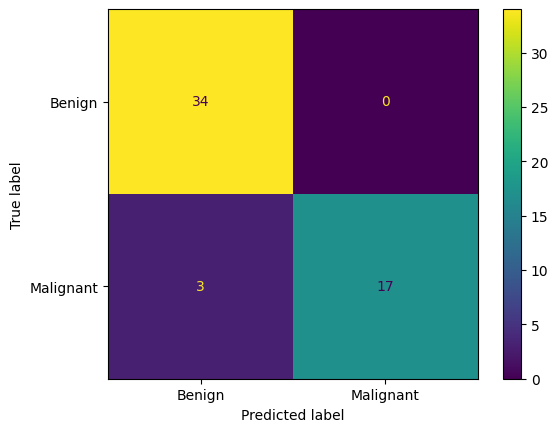

In [12]:
classes = dataset['Diagnosis Result'].unique()

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot()

plt.show()

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 94.44444444444444


In [14]:
import tkinter as tk
from tkinter import messagebox

In [15]:
import tkinter as tk
from tkinter import messagebox
import numpy as np

def predict_risk():
    try:
        # Collect user input
        inputs = [
            float(age_entry.get()),
            menopause_var.get(),
            float(tumor_size_entry.get()),
            float(inv_nodes_entry.get()),
            metastasis_var.get(),
            history_var.get(),
            breast_var.get(),
            breast_quadrant_var.get(),
        ]
        
        # Preprocess the input
        input_array = np.array(inputs).reshape(1, -1)
        input_scaled = sc.transform(input_array)
        
        # Make prediction
        prediction = classifier.predict(input_scaled)[0]
        result = "High Risk (1)" if prediction == 1 else "Low Risk (0)"
        
        # Analyze contributing factors
        thresholds = [
            ("Age", inputs[0], "Older age increases risk"),
            ("Menopause", inputs[1], "Menopause status may increase risk"),
            ("Tumor Size (cm)", inputs[2], "Larger tumor size increases risk"),
            ("Inv-Nodes", inputs[3], "Higher lymph node involvement increases risk"),
            ("Metastasis", inputs[4], "Metastasis presence increases risk"),
            ("History", inputs[5], "History of cancer increases risk"),
            ("Breast (0=Left, 1=Right)", inputs[6], "Breast location influence"),
            ("Breast Quadrant", inputs[7], "Breast quadrant influence"),
        ]
        
        contributing_factors = []
        for feature, value, explanation in thresholds:
            # Identifying significant contributors
            if value > 0:
                contributing_factors.append(f"{feature}: {value} ({explanation})")
        
        factors_message = "\n".join(contributing_factors) if contributing_factors else "No significant risk factors detected."
        
        # Display the prediction and contributing factors
        messagebox.showinfo("Prediction Result", f"The patient is at: {result}\n\nContributing Factors:\n{factors_message}")
    except Exception as e:
        messagebox.showerror("Error", f"Invalid input: {e}")

# Create the GUI
root = tk.Tk()
root.title("Breast Cancer Risk Prediction")

# Input Fields
tk.Label(root, text="Age").grid(row=0, column=0, padx=10, pady=5)
age_entry = tk.Entry(root)
age_entry.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Menopause (0=No, 1=Yes)").grid(row=1, column=0, padx=10, pady=5)
menopause_var = tk.IntVar()
tk.Entry(root, textvariable=menopause_var).grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Tumor Size (cm)").grid(row=2, column=0, padx=10, pady=5)
tumor_size_entry = tk.Entry(root)
tumor_size_entry.grid(row=2, column=1, padx=10, pady=5)

tk.Label(root, text="Inv-Nodes").grid(row=3, column=0, padx=10, pady=5)
inv_nodes_entry = tk.Entry(root)
inv_nodes_entry.grid(row=3, column=1, padx=10, pady=5)

tk.Label(root, text="Metastasis (0=No, 1=Yes)").grid(row=4, column=0, padx=10, pady=5)
metastasis_var = tk.IntVar()
tk.Entry(root, textvariable=metastasis_var).grid(row=4, column=1, padx=10, pady=5)

tk.Label(root, text="History (0=No, 1=Yes)").grid(row=5, column=0, padx=10, pady=5)
history_var = tk.IntVar()
tk.Entry(root, textvariable=history_var).grid(row=5, column=1, padx=10, pady=5)

tk.Label(root, text="Breast (0=Left, 1=Right)").grid(row=6, column=0, padx=10, pady=5)
breast_var = tk.IntVar()
tk.Entry(root, textvariable=breast_var).grid(row=6, column=1, padx=10, pady=5)

tk.Label(root, text="Breast Quadrant (0-4)").grid(row=7, column=0, padx=10, pady=5)
breast_quadrant_var = tk.IntVar()
tk.Entry(root, textvariable=breast_quadrant_var).grid(row=7, column=1, padx=10, pady=5)

# Predict Button
predict_button = tk.Button(root, text="Predict Risk", command=predict_risk)
predict_button.grid(row=8, column=0, columnspan=2, pady=10)

# Run the GUI loop
root.mainloop()


In [16]:
import joblib

# Save the trained classifier and scaler
joblib.dump(classifier, 'svm_classifier.pkl')
joblib.dump(sc, 'scaler.pkl')


['scaler.pkl']